In [1]:
import torch
from diffusers import DDPMPipeline, UNet2DModel
from scheduling_rectflow import RectFlowScheduler
import matplotlib.pyplot as plt
import os

# Load the trained model and scheduler
model_dir = "./output/test3"
unet = UNet2DModel.from_pretrained(f"{model_dir}/unet")
scheduler_config_path = os.path.join(model_dir, "scheduler", "scheduler_config.json")
noise_scheduler = RectFlowScheduler.from_config(scheduler_config_path)
if torch.cuda.is_available():
    unet.to('cuda')

# Create the pipeline
pipeline = DDPMPipeline(
    unet=unet,
    scheduler=noise_scheduler,
)

/home/schu23/.conda/envs/writebeau/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
/data/schu23/mldl/project/Handwriting-Beautification/diffusers/src/diffusers/configuration_utils.py:245: FutureWarning: It is deprecated to pass a pretrained model name or path to `from_config`.If you were trying to load a scheduler, please use <class 'scheduling_rectflow.RectFlowScheduler'>.from_pretrained(...) instead. Otherwise, please make sure to pass a configuration dictionary instead. This functionality will be removed in v1.0.0.
  deprecate("config-passed-as-path", "1.0.0", deprecation_message, standard_warn=False)


100%|█████████████████████████████████████████████████████████████████| 50/50 [00:00<00:00, 74.47it/s]


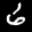

In [24]:
# Run the reverse diffusion process
generated_images = pipeline(num_inference_steps=50).images
generated_images[0]